In [1]:
from pvodataset import PVODataset, UDFClass, QCfunc
import pandas as pd

In [2]:
# load PV output Dataset
pvod = PVODataset(path="../datasets/",timezone="UTC+8")

Welcome to PVODataset (PVOD).


In [3]:
# show basic information of PV output Dataset
pvod.info()

PVOD provides 1 metadata file and 10 PV station data files. The header of station files is : 'date_time', 'nwp_globalirrad', 'nwp_dirrectirrad', 'nwp_temperature', 'nwp_humidity', 'nwp_windspeed', 'nwp_winddirection', 'nwp_pressure','lmd_totalirrad', 'lmd_diffuseirrad', 'lmd_temperature', 'lmd_pressure','lmd_winddirection', 'lmd_windspeed', 'power'.              
-->Records of Station_0 are 28896.
-->Records of Station_1 are 33408.
-->Records of Station_2 are 30432.
-->Records of Station_3 are 14688.
-->Records of Station_4 are 33408.
-->Records of Station_5 are 9696.
-->Records of Station_6 are 31104.
-->Records of Station_7 are 32928.
-->Records of Station_8 are 33120.
-->Records of Station_9 are 24288.
-> Total 271968 records.


In [4]:
# show all files
files = pvod.show_files()
files

['metadata.csv',
 'README.md',
 'station00.csv',
 'station01.csv',
 'station02.csv',
 'station03.csv',
 'station04.csv',
 'station05.csv',
 'station06.csv',
 'station07.csv',
 'station08.csv',
 'station09.csv']

In [5]:
# load metadata
metadata = pvod.read_metadata()
metadata

,Station_ID,Capacity,PV_Technology,Panel_Size,Panel_Number,Array_Tilt,Longitude,Latitude
0,station00,6600,Poly-Si,1.62360,26000,South 33°,114.951390,38.047780
1,station01,20000,Poly-Si,1.66350,74000,South 33°,117.457220,38.183060
2,station02,17000,Mono-Si,1.63680,64064,South 29°,114.198870,38.057280
3,station03,20000,Poly-Si,1.62000,75460,South 33°,114.114940,38.109560
4,station04,20000,Poly-Si,1.63680,75680,South 37°,114.867670,39.515500
5,station05,35000,Poly-Si,1.63515,114972,South 33°,114.123600,38.235500
6,station06,15000,Poly-Si,1.63350,56608,South 34°,114.548410,36.898910
7,station07,20000,Poly-Si,1.63350,80000,South 31°,113.641870,36.644030
8,station08,20000,Poly-Si,1.63350,78042,South 33°,113.899990,36.707610
9,station09,20000,Poly-Si,1.61370,84480,South 31°,115.059855,38.731417


In [6]:
# load selected station original data
# pd.set_option('display.max_columns', 5)

ori_data = pvod.read_ori_data(station_id=3)
ori_data

,date_time,nwp_globalirrad,nwp_directirrad,nwp_temperature,nwp_humidity,nwp_windspeed,nwp_winddirection,nwp_pressure,lmd_totalirrad,lmd_diffuseirrad,lmd_temperature,lmd_pressure,lmd_winddirection,lmd_windspeed,power
0,2019-01-12 00:00:00+08:00,0.0,0.0,-0.07,44.66,1.50,234.97,989.14,0,0.0,-2.800000,988.500000,48,1.0,0.0
1,2019-01-12 00:15:00+08:00,0.0,0.0,-0.13,45.23,1.59,238.49,989.14,0,0.0,-2.800000,988.500000,138,1.0,0.0
2,2019-01-12 00:30:00+08:00,0.0,0.0,-0.15,45.60,1.67,246.38,989.25,0,0.0,-2.800000,988.500000,40,1.0,0.0
3,2019-01-12 00:45:00+08:00,0.0,0.0,-0.17,45.86,1.77,255.51,989.31,0,0.0,-3.900000,988.500000,130,1.0,0.0
4,2019-01-12 01:00:00+08:00,0.0,0.0,-0.21,46.08,1.88,262.02,989.08,0,0.0,-3.900000,988.500000,158,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14683,2019-06-13 22:45:00+08:00,0.0,0.0,24.45,61.99,4.00,327.25,974.82,0,0.0,21.799999,972.799988,72,0.8,0.0
14684,2019-06-13 23:00:00+08:00,0.0,0.0,24.24,62.48,4.08,331.59,974.96,0,0.0,20.700001,972.799988,350,0.7,0.0
14685,2019-06-13 23:15:00+08:00,0.0,0.0,24.08,62.74,4.02,334.14,975.13,0,0.0,20.700001,972.799988,71,1.0,0.0
14686,2019-06-13 23:30:00+08:00,0.0,0.0,23.95,62.97,3.94,334.80,975.28,0,0.0,20.700001,972.799988,104,0.0,0.0


In [7]:
# select feature (Power) slice 
ori_data["power"][128:256]

128    0.440455
129    1.307158
130    2.358568
131    3.452602
132    4.504012
         ...   
251    3.537852
252    4.916051
253    3.253687
254    4.305097
255    2.244902
Name: power, Length: 128, dtype: float64

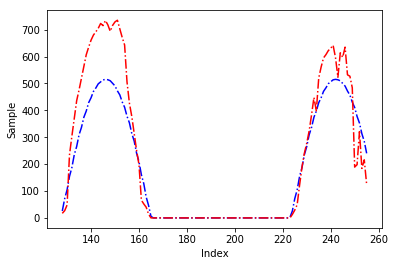

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ori_data["nwp_globalirrad"][128:256], 'b-.')
plt.plot(ori_data["lmd_totalirrad"][128:256],  'r-.')

plt.ylabel('Sample')
plt.xlabel('Index')

plt.show()

In [9]:
ori_data.keys()

Index(['date_time', 'nwp_globalirrad', 'nwp_directirrad', 'nwp_temperature',
       'nwp_humidity', 'nwp_windspeed', 'nwp_winddirection', 'nwp_pressure',
       'lmd_totalirrad', 'lmd_diffuseirrad', 'lmd_temperature', 'lmd_pressure',
       'lmd_winddirection', 'lmd_windspeed', 'power'],
      dtype='object')

In [10]:
station01_info = pvod.station_info(station_id=5)
station01_info

,nwp_globalirrad,nwp_directirrad,nwp_temperature,nwp_humidity,nwp_windspeed,nwp_winddirection,nwp_pressure,lmd_totalirrad,lmd_diffuseirrad,lmd_temperature,lmd_pressure,lmd_winddirection,lmd_windspeed,power
count,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000,9696.000000
mean,236.183484,210.278758,17.576996,33.857412,4.229796,200.783447,990.266742,232.338490,104.553733,17.914068,988.217985,175.022380,1.695854,7.055607
std,301.375854,280.036566,8.419162,19.594040,2.333221,94.170052,7.315803,320.622654,135.135731,7.603053,7.049093,115.051643,1.502231,9.750248
min,0.000000,0.000000,0.490000,5.110000,0.170000,0.050000,971.200000,0.000000,0.000000,-0.300000,970.500000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,10.910000,19.987500,2.540000,122.485000,984.317500,0.000000,0.000000,12.000000,982.799988,59.000000,0.600000,0.000000
50%,38.885000,11.765000,17.180000,28.620000,3.790000,233.440000,990.050000,26.000000,28.000000,18.000000,987.700012,157.000000,1.400000,0.697046
75%,467.527500,412.795000,23.452500,42.860000,5.410000,279.170000,995.650000,436.250000,191.000000,23.299999,993.700012,292.000000,2.500000,13.394230
max,940.360000,884.030000,39.980000,98.380000,14.350000,359.970000,1009.530000,1156.000000,762.000000,39.099998,1007.400024,359.000000,16.000000,35.118130


In [11]:
# select data within date range 
pd.set_option('display.max_columns', 4)

t1 = '2019/3/05 08:30'
t2 = '2019/5/20 17:00'
slice_data = pvod.select_daterange(station_id=5, start_date=t1, end_date=t2)
slice_data

,date_time,nwp_globalirrad,nwp_directirrad,nwp_temperature,...,lmd_pressure,lmd_winddirection,lmd_windspeed,power
34,2019-03-05 08:30:00+08:00,255.72,219.52,9.71,...,994.400024,211,1.5,0.00000
35,2019-03-05 08:45:00+08:00,312.05,272.84,10.50,...,994.500000,212,0.4,0.00000
36,2019-03-05 09:00:00+08:00,348.63,307.68,11.09,...,994.500000,208,0.7,0.00000
37,2019-03-05 09:15:00+08:00,401.60,358.34,11.62,...,994.599976,209,1.1,12.92200
38,2019-03-05 09:30:00+08:00,435.36,390.76,11.98,...,994.500000,115,0.0,15.37944
...,...,...,...,...,...,...,...,...,...
7360,2019-05-20 16:00:00+08:00,602.98,554.91,27.31,...,984.599976,33,3.3,18.14094
7361,2019-05-20 16:15:00+08:00,551.86,505.30,27.26,...,984.500000,33,3.9,16.38525
7362,2019-05-20 16:30:00+08:00,516.56,471.12,27.23,...,984.400024,33,1.4,14.43706
7363,2019-05-20 16:45:00+08:00,462.04,418.40,27.16,...,984.400024,41,4.1,12.47291


In [12]:
# data intersection between 2 PV stations
start, end = pvod.date_intersection(station_id_a=3, station_id_b=9)
start, end

Station_3   : start: 2019-01-12 00:00:00+08:00, end: 2019-06-13 23:45:00+08:00
Station_9   : start: 2018-09-26 00:00:00+08:00, end: 2019-06-13 23:45:00+08:00
intersection: start: 2019-01-12 00:00:00+08:00, end: 2019-06-13 23:45:00+08:00


(Timestamp('2019-01-12 00:00:00+0800', tz='Asia/Shanghai'),
 Timestamp('2019-06-13 23:45:00+0800', tz='Asia/Shanghai'))

In [13]:
ori_data = pvod.read_ori_data(station_id=3)
ori_data
train_data, test_data = pvod.split_data(xy=ori_data, mode="end_order", ratio=0.8)
print(f"train :\n {train_data} \n=========================\
        test:\n {test_data}, \n\=========================\
        len_train: {len(train_data)}, len_test: {len(test_data)}")

train :
                       date_time  nwp_globalirrad  nwp_directirrad  \
0     2019-01-12 00:00:00+08:00             0.00             0.00   
1     2019-01-12 00:15:00+08:00             0.00             0.00   
2     2019-01-12 00:30:00+08:00             0.00             0.00   
3     2019-01-12 00:45:00+08:00             0.00             0.00   
4     2019-01-12 01:00:00+08:00             0.00             0.00   
...                         ...              ...              ...   
11745 2019-05-14 08:15:00+08:00           498.38           453.51   
11746 2019-05-14 08:30:00+08:00           532.70           486.76   
11747 2019-05-14 08:45:00+08:00           581.54           534.18   
11748 2019-05-14 09:00:00+08:00           609.95           561.95   
11749 2019-05-14 09:15:00+08:00           647.76           599.06   

       nwp_temperature  ...  lmd_pressure  lmd_winddirection  lmd_windspeed  \
0                -0.07  ...    988.500000                 48            1.0   
1   

In [14]:
users_func = UDFClass()
users_func.calcuate(station_id=1, param0='Panel_Size', param1='Panel_Number')
users_func.get_id_metedata(1)

Welcome to PVODataset (PVOD).
area = 123099.0 m^2.


Station_ID       station01
Capacity             20000
PV_Technology      Poly-Si
Panel_Size          1.6635
Panel_Number         74000
Array_Tilt       South 33°
Longitude          117.457
Latitude           38.1831
Name: 1, dtype: object

In [15]:
ori_data.keys()

Index(['date_time', 'nwp_globalirrad', 'nwp_directirrad', 'nwp_temperature',
       'nwp_humidity', 'nwp_windspeed', 'nwp_winddirection', 'nwp_pressure',
       'lmd_totalirrad', 'lmd_diffuseirrad', 'lmd_temperature', 'lmd_pressure',
       'lmd_winddirection', 'lmd_windspeed', 'power'],
      dtype='object')

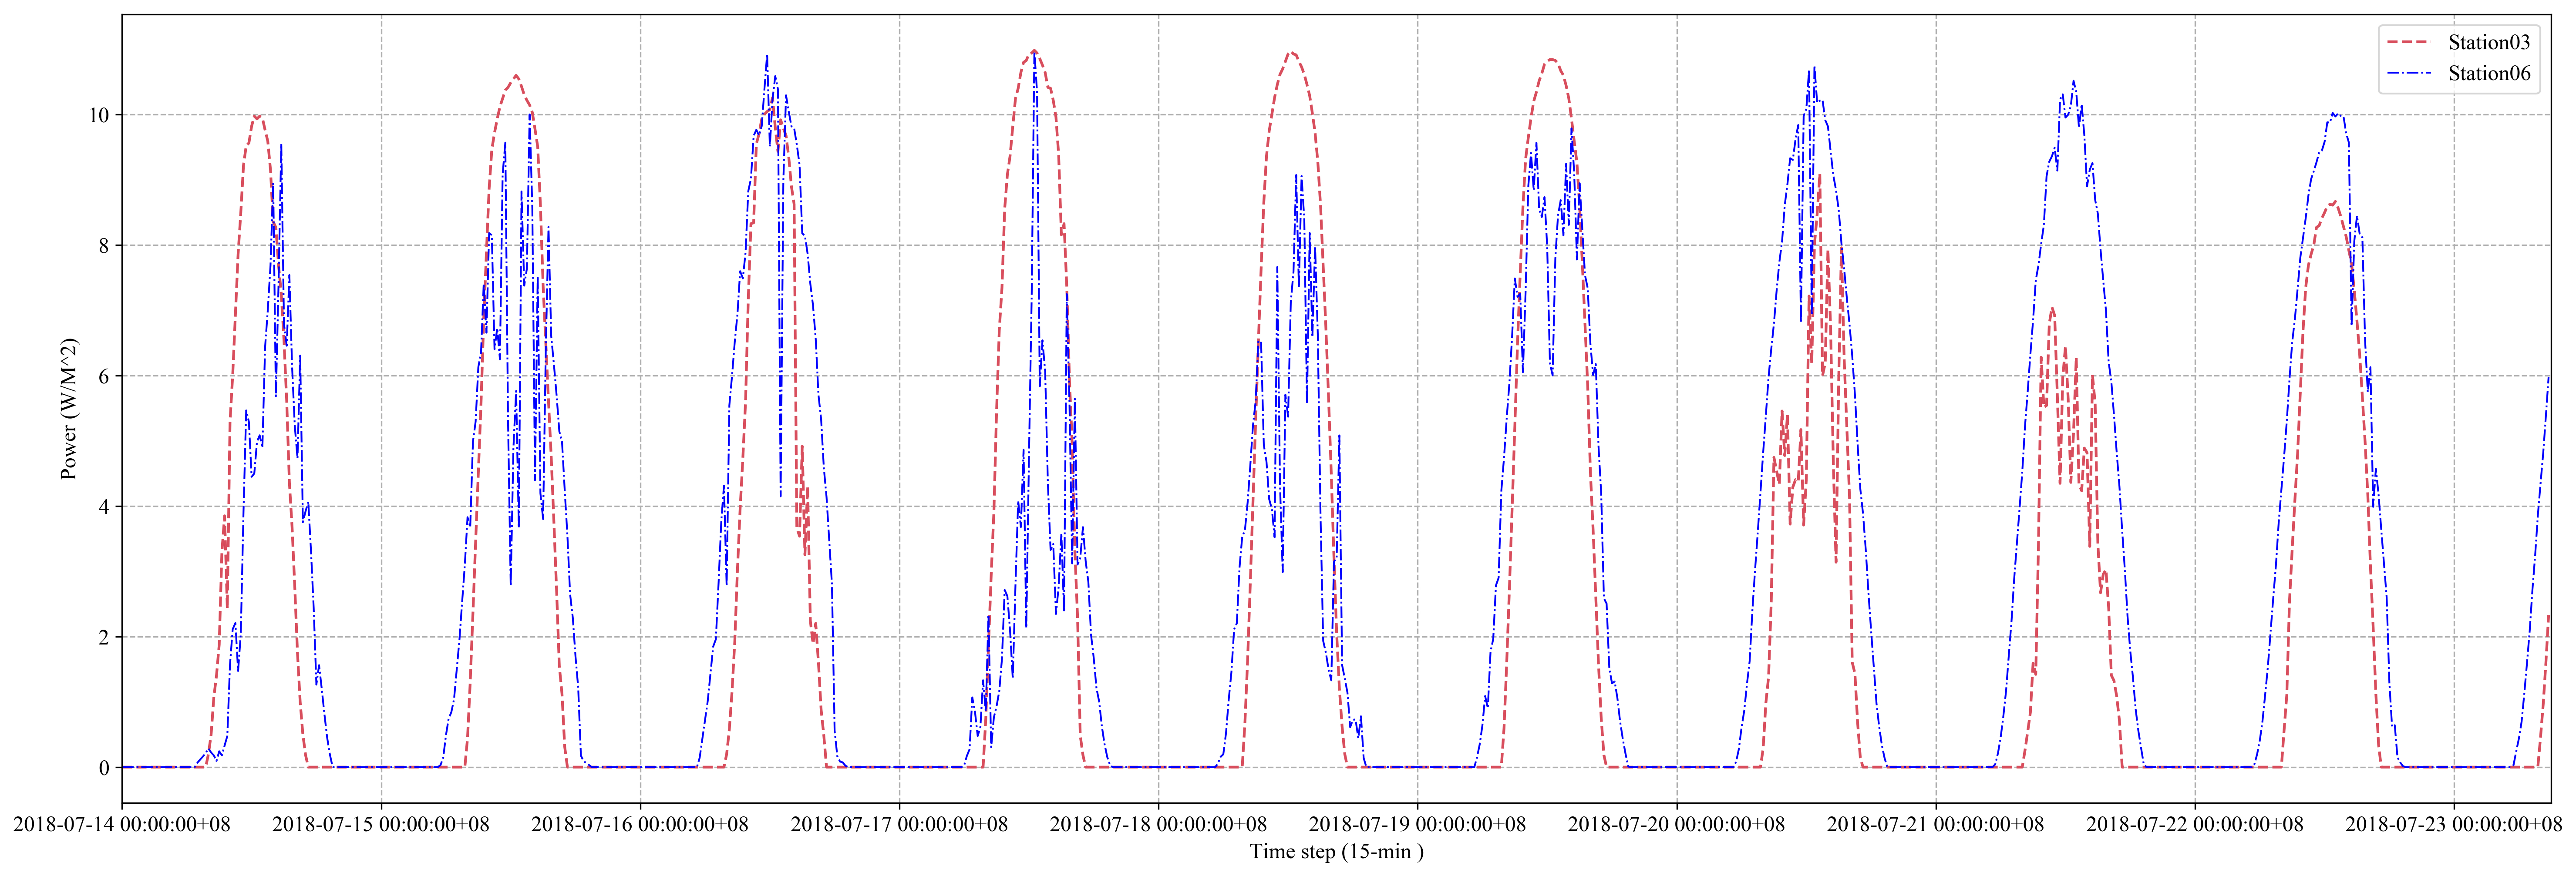

In [16]:
ori_data0 = pvod.read_ori_data(3)
ori_data2 = pvod.read_ori_data(6)
start, end = 0, 900
datet = ori_data2["date_time"][start:end]
datet = [str(i)[:-3] for i in datet]
tmp_t = [datet[i] for i in list(range(start,end,96))]

import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
plt.figure(figsize=(24,8),dpi=300)

fs = 12



line0, = plt.plot(ori_data0["power"][start:end], color='#D94E5D', linestyle='--')
line1, = plt.plot(ori_data2["power"][start:end], color='blue', linestyle='-.', linewidth=1)

plt.legend(handles=[line0, line1], labels=['Station03','Station06'], loc='upper right',fontsize=fs)
plt.xticks(list(range(start,end,96)), tmp_t)
# plt.ylim(0.5,1)

plt.grid(ls='--')
plt.xlim(0,end)
plt.yticks(size = fs)
plt.xticks(size = fs)
plt.ylabel('Power (W/M^2)',fontsize=fs)
plt.xlabel('Time step (15-min )',fontsize=fs)
plt.savefig('./power.pdf',bbox_inches='tight',format='pdf')
plt.show()


In [17]:
# load PV output Dataset after QC
pvod2 = PVODataset(path="../datasets/",timezone="UTC+8", qc=True)


Welcome to PVODataset (PVOD).
Quality control is set to True.


In [18]:
pvod2.info()

PVOD provides 1 metadata file and 10 PV station data files. The header of station files is : 'date_time', 'nwp_globalirrad', 'nwp_dirrectirrad', 'nwp_temperature', 'nwp_humidity', 'nwp_windspeed', 'nwp_winddirection', 'nwp_pressure','lmd_totalirrad', 'lmd_diffuseirrad', 'lmd_temperature', 'lmd_pressure','lmd_winddirection', 'lmd_windspeed', 'power'.              
-->Records of Station_0 are 4715.
-->Records of Station_1 are 4616.
-->Records of Station_2 are 4514.
-->Records of Station_3 are 1802.
-->Records of Station_4 are 3953.
-->Records of Station_5 are 1305.
-->Records of Station_6 are 3831.
-->Records of Station_7 are 3962.
-->Records of Station_8 are 4698.
-->Records of Station_9 are 2676.
-> Total 36072 records.


# Heatmap of all the Features

In [1]:
from pvodataset import PVODataset
import pandas as pd

pvod = PVODataset(path="../datasets/",timezone="UTC+8")
ori_data = pvod.read_ori_data(station_id=0)
ori_data = ori_data.drop(columns='date_time')
ori_data

Welcome to PVODataset (PVOD).


,nwp_globalirrad,nwp_directirrad,nwp_temperature,nwp_humidity,nwp_windspeed,nwp_winddirection,nwp_pressure,lmd_totalirrad,lmd_diffuseirrad,lmd_temperature,lmd_pressure,lmd_winddirection,lmd_windspeed,power
0,0.0,0.0,22.78,96.85,4.28,339.41,1007.27,0,0,25.900000,1006.299988,353,1.1,0.0
1,0.0,0.0,22.75,96.91,4.30,337.27,1007.27,0,0,25.900000,1006.200012,330,0.9,0.0
2,0.0,0.0,22.71,96.95,4.28,334.47,1007.48,0,0,25.799999,1006.299988,1,1.9,0.0
3,0.0,0.0,22.64,97.12,4.28,331.52,1007.39,0,0,25.600000,1006.299988,309,0.4,0.0
4,0.0,0.0,22.57,97.15,4.33,329.78,1007.09,0,0,25.700001,1006.299988,335,1.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28891,0.0,0.0,26.04,49.55,4.46,50.84,1000.10,0,0,24.299999,998.900024,177,0.1,0.0
28892,0.0,0.0,25.80,51.03,4.39,53.53,1000.24,0,0,23.600000,998.900024,42,0.6,0.0
28893,0.0,0.0,25.54,52.43,4.23,57.52,1000.35,0,0,24.400000,999.000000,68,0.0,0.0
28894,0.0,0.0,25.23,53.84,4.05,67.15,1000.52,0,0,24.000000,998.900024,278,0.7,0.0


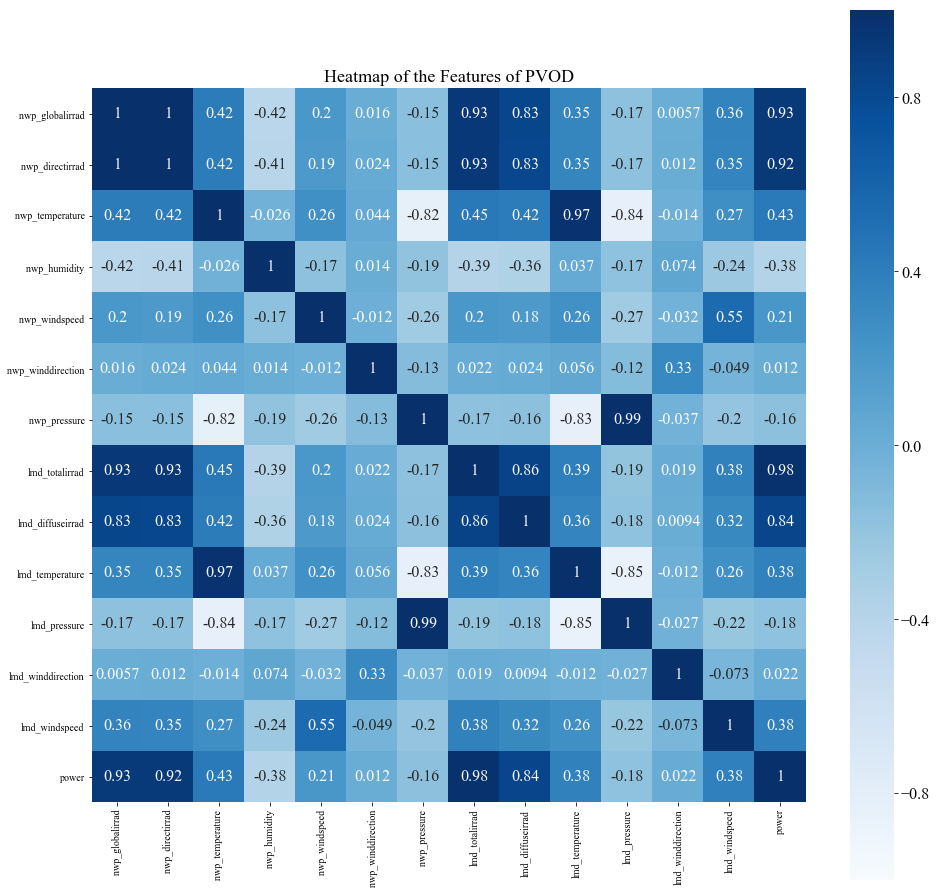

In [3]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.subplots(figsize=(16, 16))
plt.rc('font',family='Times New Roman',size=16)

sns.heatmap(ori_data.corr(), center=0, annot=True, vmax=1.0, vmin=-1,square = True,cmap="Blues")
plt.title("Heatmap of the Features of PVOD", fontsize = 18)
# plt.savefig( 'corr.pdf', bbox_inches='tight',format='pdf')
plt.savefig( 'corr.png', bbox_inches='tight')

plt.show()